In [78]:
import pandas as pd
import swifter
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15, 6]

In [4]:
dosis = pd.read_csv('vacunas_covid.csv')

In [5]:
dosis.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210613,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,20210613,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA
2,20210613,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS
3,20210613,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA
4,20210613,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210512,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA


In [10]:
def parse_date(x):
	return pd.to_datetime(x, format='%Y%m%d', errors='ignore')

In [11]:
dosis['fecha'] = dosis['FECHA_VACUNACION'].swifter.apply(parse_date)

In [12]:
dosis.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,fecha
0,20210613,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA,2021-02-22
1,20210613,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA,2021-03-10
2,20210613,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS,2021-04-17
3,20210613,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-04-22
4,20210613,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210512,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-05-12


In [13]:
def diferencia(x):
    return (pd.to_datetime('20210617', format='%Y%m%d', errors='ignore') - x).days

In [14]:
dosis['diferencia'] = dosis['fecha'].swifter.apply(diferencia)

In [15]:
dosis.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,fecha,diferencia
0,20210613,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA,2021-02-22,115
1,20210613,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA,2021-03-10,99
2,20210613,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS,2021-04-17,61
3,20210613,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-04-22,56
4,20210613,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210512,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-05-12,36


In [23]:
dosis['Occur'] = dosis.groupby('UUID')['UUID'].transform('size')

In [81]:
dosis.head(n = 10)

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,fecha,diferencia,Occur
0,20210613,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA,2021-02-22,115,1
1,20210613,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA,2021-03-10,99,1
2,20210613,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS,2021-04-17,61,1
3,20210613,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-04-22,56,1
4,20210613,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210512,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-05-12,36,2
5,20210613,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210609,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-06-09,8,2
6,20210613,827510a2b2e6eb0bf11b434cb533d98d,ADULTO MAYOR,64.0,FEMENINO,20210514,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-05-14,34,2
7,20210613,827510a2b2e6eb0bf11b434cb533d98d,ADULTO MAYOR,64.0,FEMENINO,20210611,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,MANANTAY,2021-06-11,6,2
8,20210613,b43de148d9b336ec16a1930de49eb302,PERSONAL DE SALUD,69.0,MASCULINO,20210222,1,SINOPHARM,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-02-22,115,2
9,20210613,b43de148d9b336ec16a1930de49eb302,PERSONAL DE SALUD,69.0,MASCULINO,20210315,2,SINOPHARM,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-03-15,94,2


In [54]:
#Dos Dosis
dos_dosis = dosis[dosis['Occur']== 2]
dos_dosis.to_csv("dos_dosis.csv")

In [79]:
una_dosis = dosis[dosis['Occur']== 1]
una_dosis.to_csv("una_dosis.csv")

In [80]:
dos_dosis.head(n = 10)

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,fecha,diferencia,Occur
4,20210613,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210512,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-05-12,36,2
5,20210613,df77e323fc3ed66bc90e57b563197d6f,ADULTO MAYOR,63.0,FEMENINO,20210609,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-06-09,8,2
6,20210613,827510a2b2e6eb0bf11b434cb533d98d,ADULTO MAYOR,64.0,FEMENINO,20210514,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-05-14,34,2
7,20210613,827510a2b2e6eb0bf11b434cb533d98d,ADULTO MAYOR,64.0,FEMENINO,20210611,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,MANANTAY,2021-06-11,6,2
8,20210613,b43de148d9b336ec16a1930de49eb302,PERSONAL DE SALUD,69.0,MASCULINO,20210222,1,SINOPHARM,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-02-22,115,2
9,20210613,b43de148d9b336ec16a1930de49eb302,PERSONAL DE SALUD,69.0,MASCULINO,20210315,2,SINOPHARM,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-03-15,94,2
10,20210613,388e30ec43b452874b1893aa979009e7,ADULTO MAYOR,65.0,MASCULINO,20210514,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-05-14,34,2
11,20210613,388e30ec43b452874b1893aa979009e7,ADULTO MAYOR,65.0,MASCULINO,20210612,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-06-12,5,2
12,20210613,253d0d75819afa35866e60310d75c029,ADULTO MAYOR,67.0,FEMENINO,20210514,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-05-14,34,2
13,20210613,253d0d75819afa35866e60310d75c029,ADULTO MAYOR,67.0,FEMENINO,20210612,2,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-06-12,5,2


In [70]:
pfizer = una_dosis.query('diferencia > 21 & FABRICANTE == "PFIZER"')

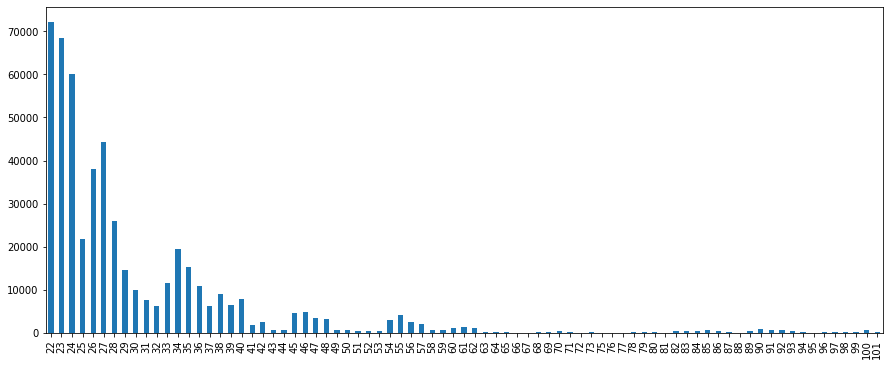

In [71]:
pfizer['diferencia'].value_counts().sort_index().plot.bar()

In [73]:
astrazeneca = una_dosis.query('diferencia > 21 & FABRICANTE == "ASTRAZENECA"')

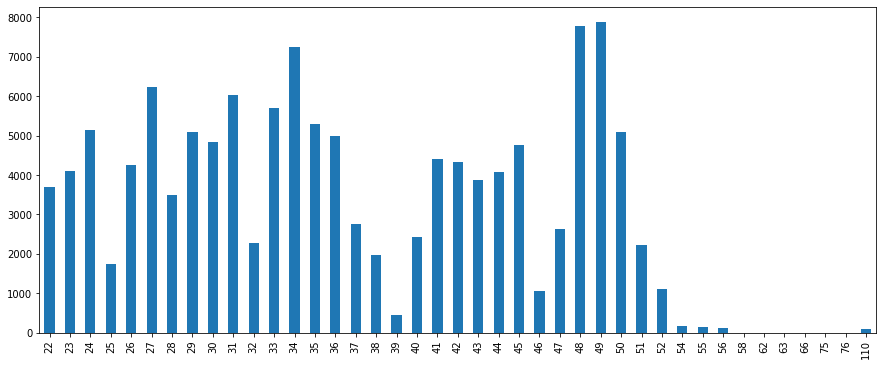

In [74]:
astrazeneca['diferencia'].value_counts().sort_index().plot.bar()

In [75]:
sinopharm = una_dosis.query('diferencia > 21 & FABRICANTE == "SINOPHARM"')

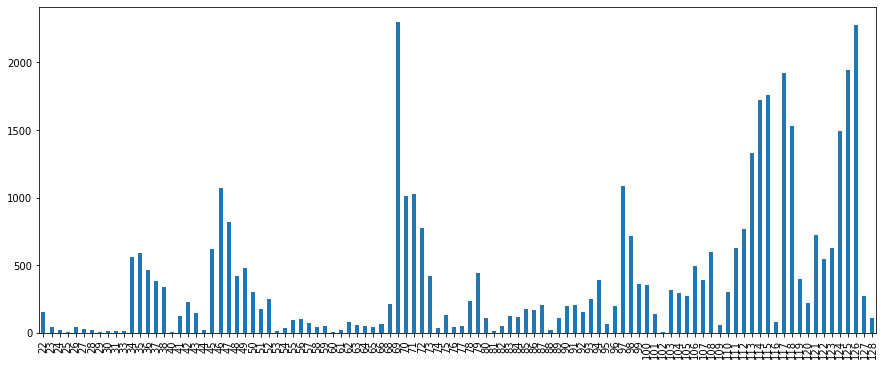

In [76]:
sinopharm['diferencia'].value_counts().sort_index().plot.bar()